<a href="https://colab.research.google.com/github/NikitaTsygura/MachineLearning/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7%D0%BE%D1%82%D0%BE%D1%80_%D1%84%D1%96%D0%BB%D1%8C%D0%BC%D1%96%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
url = "movies_metadata.csv"

movies_df = pd.read_csv(url)

movies_df.head()

/tmp/ipython-input-2933393988.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(url)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [17]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [18]:
movies_df.describe()


,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


**попередня обробка та очистка данних**

In [19]:
movies_df.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


**Заполнить пропуски ... (у колонці)**

In [20]:
#df["column_name"].fillna("чим заповнити",inplace=True)
#df["column_name"].fillna(df["column_anme"].mean(),inplace=True)

movies_df["homepage"].fillna("with out link",inplace=True)

/tmp/ipython-input-2804394963.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df["homepage"].fillna("with out link",inplace=True)


**Убрать пустіе ячейкі**

In [9]:
movies_df.dropna(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2572 entries, 2 to 45358
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2572 non-null   object 
 1   belongs_to_collection  2572 non-null   object 
 2   budget                 2572 non-null   object 
 3   genres                 2572 non-null   object 
 4   homepage               2572 non-null   object 
 5   id                     2572 non-null   object 
 6   imdb_id                2572 non-null   object 
 7   original_language      2572 non-null   object 
 8   original_title         2572 non-null   object 
 9   overview               2572 non-null   object 
 10  popularity             2572 non-null   object 
 11  poster_path            2572 non-null   object 
 12  production_companies   2572 non-null   object 
 13  production_countries   2572 non-null   object 
 14  release_date           2572 non-null   object 
 15  revenue 

**створення колонки, де берем інформацію із "release_date"**
(dt = data)

In [10]:
movies_df["release_year"] = pd.to_datetime(movies_df["release_date"]).dt.year

**... окщо більше чим 1 данних**

In [11]:
movies_df[["release_date", "release_year"]]

,release_date,release_year
2,1995-12-22,1995
4,1995-02-10,1995
9,1995-11-16,1995
12,1995-12-22,1995
18,1995-11-10,1995
...,...,...
45240,1973-04-13,1973
45241,1972-09-28,1972
45258,2017-07-21,2017
45353,1967-03-15,1967


**Аналіз та дослідження данрих**

In [21]:
genre_counts = movies_df["genres"].value_counts()
print(genre_counts)

genres
[{'id': 18, 'name': 'Drama'}]                                                                                                                                            5000
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                           3621
[{'id': 99, 'name': 'Documentary'}]                                                                                                                                      2723
[]                                                                                                                                                                       2442
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                          1301
                                                                                                                           

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

**Обробка жанрів**

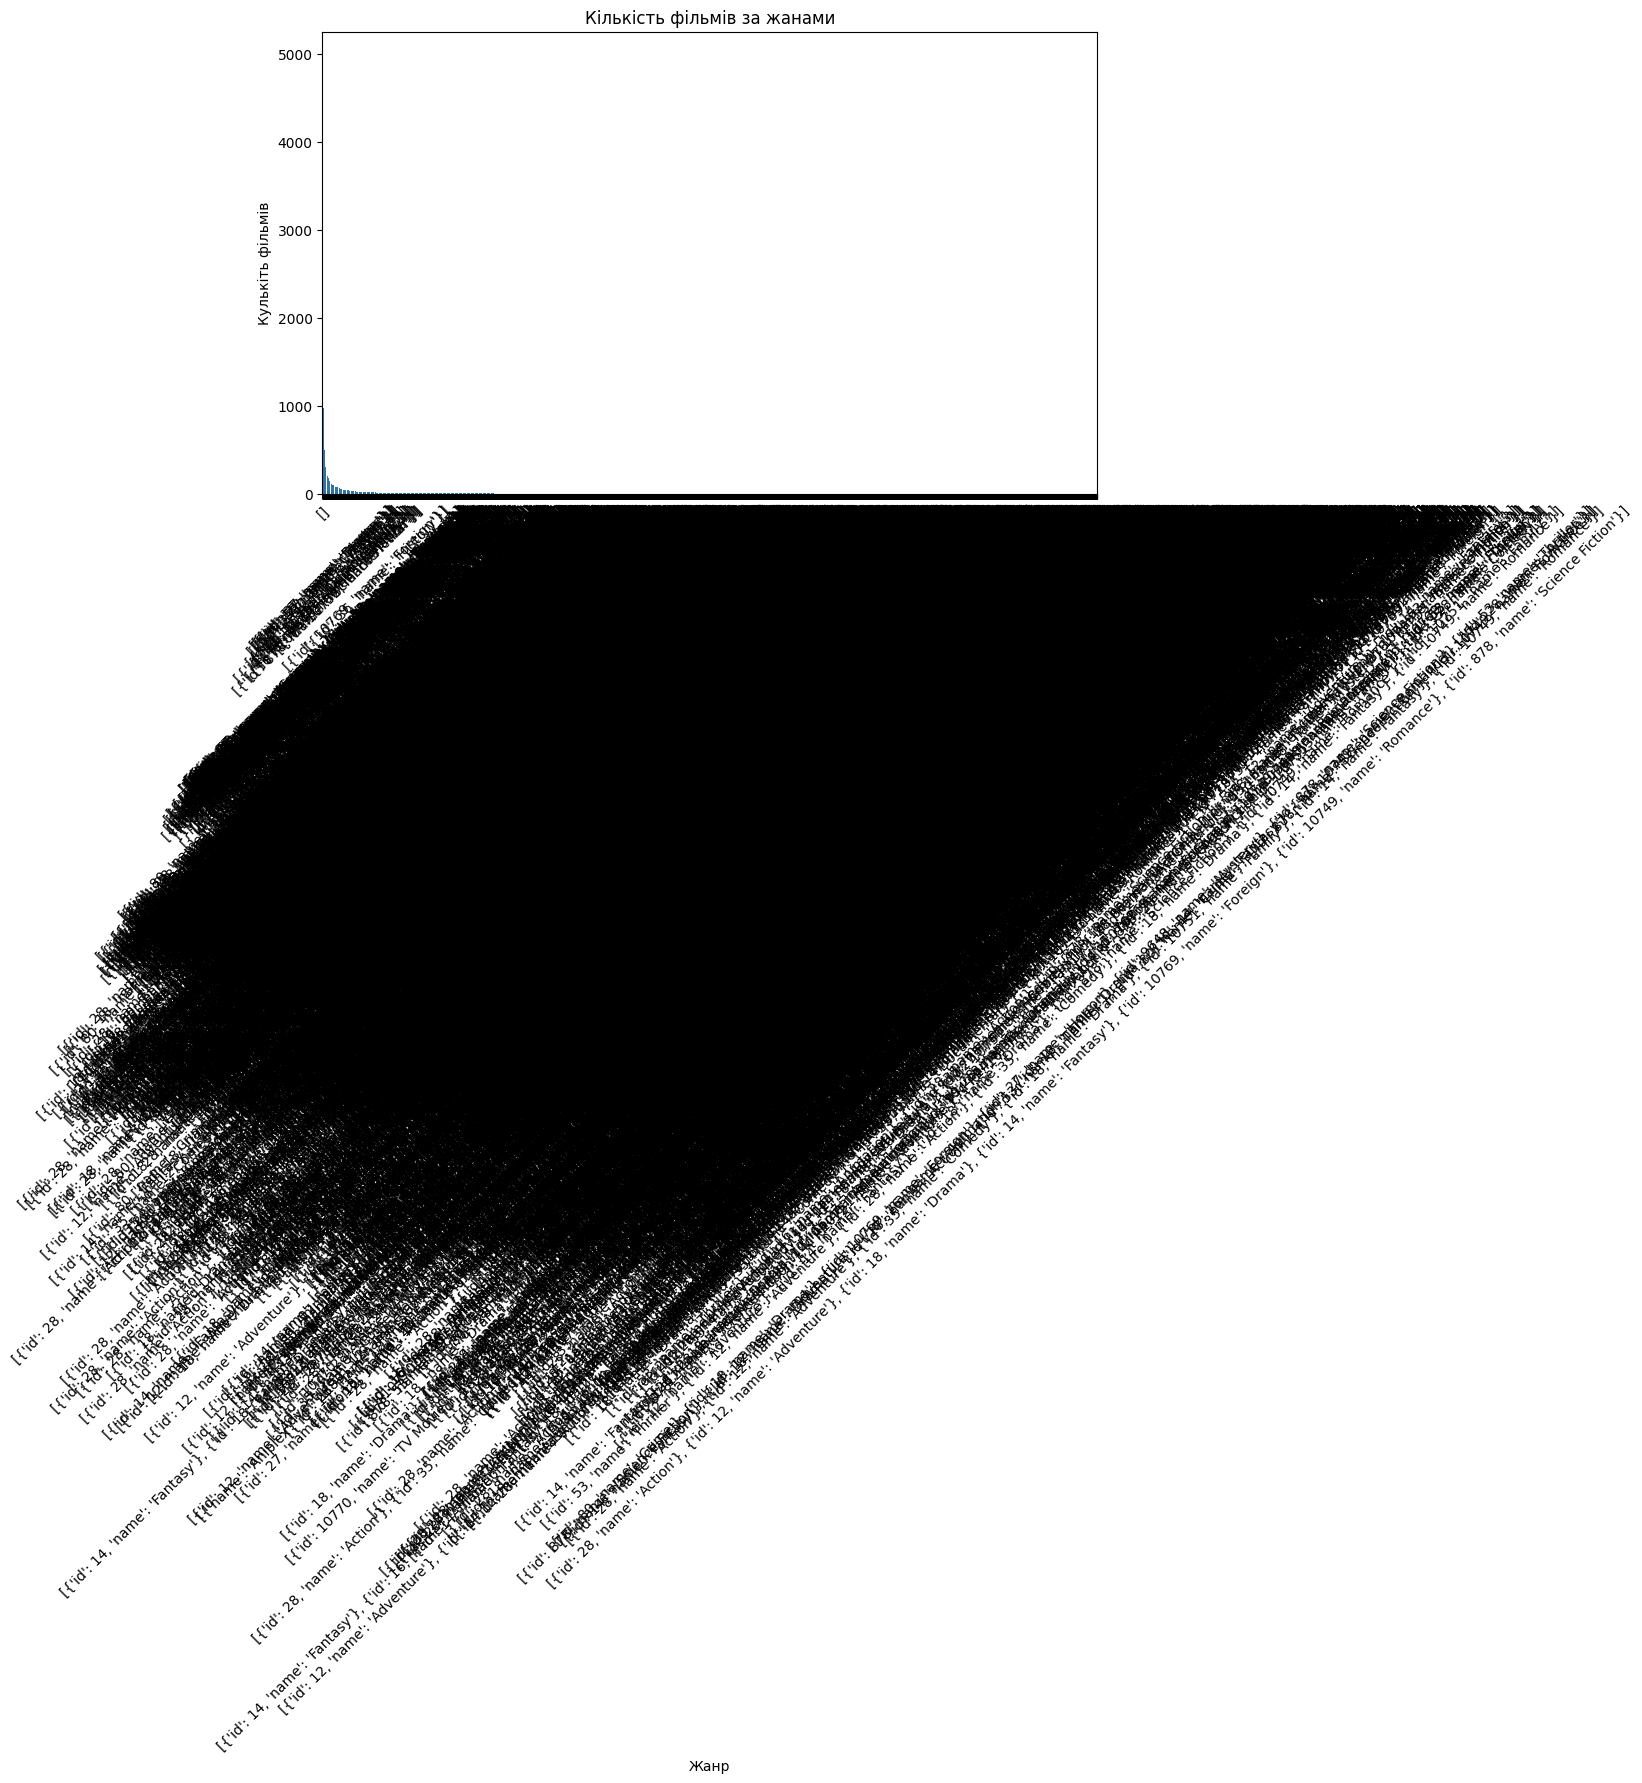

In [29]:
plt.figure(figsize=(10,6))

sns.barplot(x=genre_counts.index, y=genre_counts.values )

plt.title("Кількість фільмів за жанами")
plt.xlabel("Жанр")
plt.ylabel("Кулькіть фільмів")

plt.xticks(rotation=45)

plt.show()

**--------**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [32]:
url = "movies_metadata.csv"

df = pd.read_csv(url)

movies_df.head()

/tmp/ipython-input-3694818605.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",with out link,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",with out link,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",with out link,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",with out link,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [40]:
def extract_generes(generes_str):
  try:
    generes = ast.literal_eval(generes_str)
    return [gener["name"]for gener in generes_str]
  except ValueError:
    return[]

**Конструкція спроби коду**

In [ ]:
# try:(спробуйб може працювате, а може ы ны)
#   pass (...)
# except___:
#   pass
# ...
# except: (оброби всы выдомы помилки)
#   pass
# else:
#   pass
# finally:
#   pass

**-------**
**-------**

In [43]:
df["genres"]

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"
...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,"[{'id': 18, 'name': 'Drama'}]"
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,[]


**Перезаписати функцію (спробувати)**

In [44]:
try:
  df["genres"] = df["genres"].apply(extract_generes)
except:
  df["genres"] = []

ValueError: Length of values (0) does not match length of index (45466)

In [ ]:
genre_counts = movies_df["genres"].value_counts()
print(genre_counts)

genres
[{'id': 18, 'name': 'Drama'}]                                                                                                                                            5000
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                           3621
[{'id': 99, 'name': 'Documentary'}]                                                                                                                                      2723
[]                                                                                                                                                                       2442
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                          1301
                                                                                                                           

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns